In [41]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

# Вариант 9

Есть параметры $a$ и $\sigma$, задающие законы нормальное распределения $N(a, \sigma^2)$ для первой выборки и $N(a + 5 \sigma, \sigma^2)$ для второй

In [5]:
a = 5
sigma = 2

Промоделируем 150 значений из первой выборки. Посмотрим на выборочную медиану и выборочное среднее

In [29]:
X_init = normal(a, sigma, 150)
print(f"Медиана = {np.median(X_init)}")
print(f"Среднее = {np.mean(X_init)}")

Медиана = 4.911857539191173
Среднее = 4.757591597937146


Добавим в нашу выборку 5 значений из второй. Посмотрим на медиану и среднее

In [30]:
data = normal(a + 5 * sigma, sigma, 5)
X_extend = np.concatenate([X_init, data])

print(f"Медиана = {np.median(X_extend)}")
print(f"Среднее = {np.mean(X_extend)}")

Медиана = 5.0027907752103085
Среднее = 5.099607213310851


Повторим данное моделирование несколько раз и исследуем поведение среднего и медианы

In [80]:
amount = 250
size = [len(X_extend)]
mean = [np.median(X_extend)]
median = [np.mean(X_extend)]
data = X_extend

for _ in range(amount):
    data_1 = normal(a, sigma, 150)
    data_2 = normal(a + 5 * sigma, sigma, 5)
    data = np.concatenate([data, data_1, data_2])
    mean.append(np.mean(data))
    median.append(np.median(data))
    size.append(len(data))

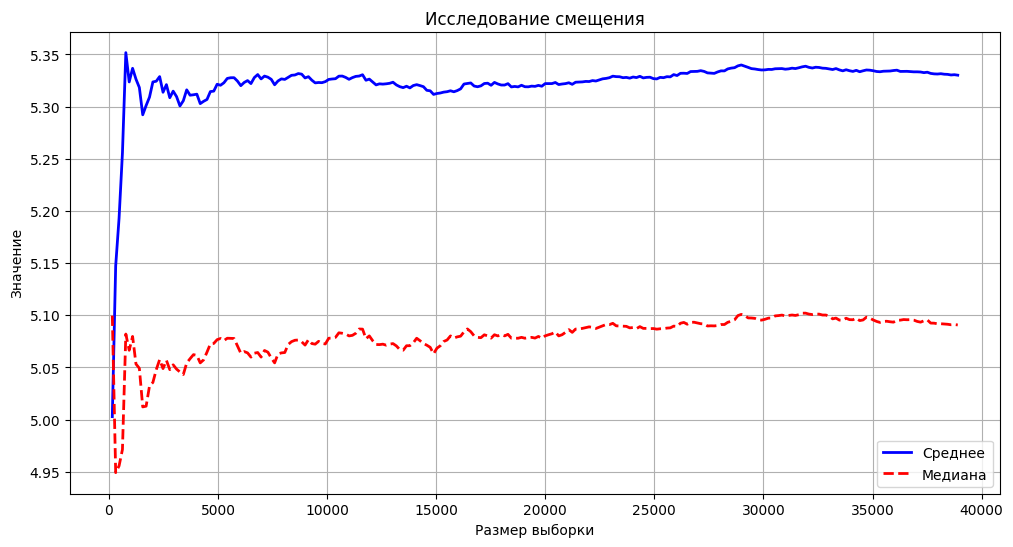

Медиана = 5.090684739826636
Среднее = 5.330104447437138


In [81]:
plt.figure(figsize=(12, 6))

plt.plot(size, mean, label='Среднее', color='blue', linestyle='-', linewidth=2)
plt.plot(size, median, label='Медиана', color='red', linestyle='--', linewidth=2)

plt.title('Исследование смещения')
plt.xlabel('Размер выборки')
plt.ylabel('Значение')
plt.grid(True)

plt.legend()
plt.show()

print(f"Медиана = {median[-1]}")
print(f"Среднее = {mean[-1]}")

И значение средего, и значение медианы увеличилось относительно $a$

Значение среднего стремится к ожидаемому теоретическим для $a = 5, \sigma = 2$ и превышает значение медианы

Посмотрим на поведение дисперсии этих величин

In [82]:
size_var = [i for i in range(5, amount + 1, 5)]
mean_var = [np.var(mean[:cur]) for cur in size_var]
median_var = [np.var(median[:cur]) for cur in size_var]

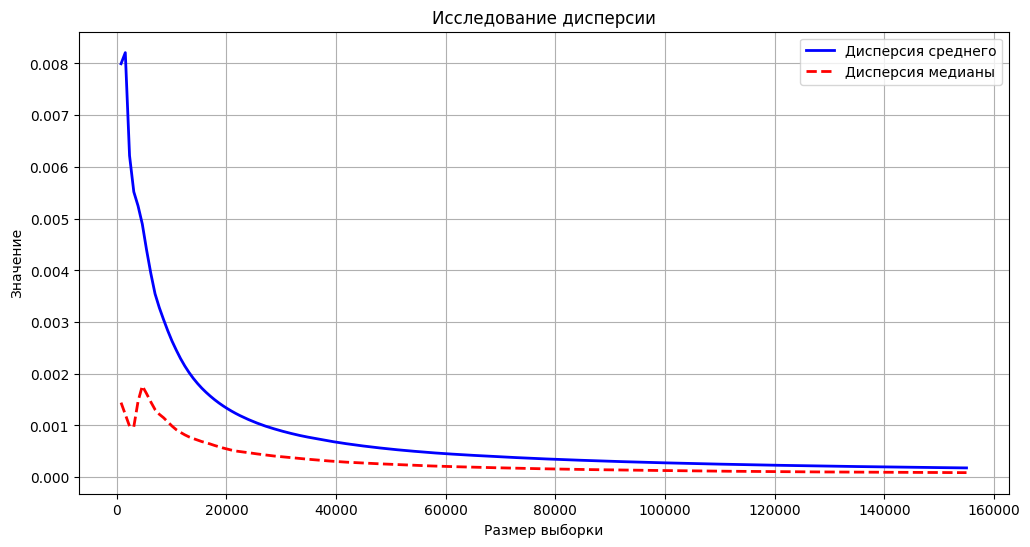

Дисперсия Медианы = 8.842464494485512e-05
Дисперсия Среднего = 0.00017961440113808768


In [79]:
cur_sizes = np.array(size_var) * 155
plt.figure(figsize=(12, 6))

plt.plot(cur_sizes, mean_var, label='Дисперсия среднего', color='blue', linestyle='-', linewidth=2)
plt.plot(cur_sizes, median_var, label='Дисперсия медианы', color='red', linestyle='--', linewidth=2)

plt.title('Исследование дисперсии')
plt.xlabel('Размер выборки')
plt.ylabel('Значение')
plt.grid(True)

plt.legend()
plt.show()

print(f"Дисперсия Медианы = {median_var[-1]}")
print(f"Дисперсия Среднего = {mean_var[-1]}")

Обе дисперсии стремятся к нулю. Дисперсия медианы меньше дисперсии среднего